In [0]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Setup
**previous_application**: 
- previous applications for loans at Home Credit of clients who have loans in the application data. 
- Each current loan in the application data can have multiple previous loans. 
- Each previous application has one row and is identified by the feature SK_ID_PREV. 



In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_pre = pd.read_csv(os.path.join(DATA_DIRECTORY, 'previous_application.csv'), nrows= None)
print(df_pre.shape)
df_pre.head()


In [0]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [0]:
# This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
#process where we calculate statistics and make figures to find trends, anomalies,
#patterns, or relationships within the data. The goal of EDA is to learn what our
#data can tell us. It generally starts out with a high level overview, 
#then narrows in to specific areas as we find intriguing areas of the data. 

def statistical_analyzing(df_input):
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

# Plotting the continous features :    
# 1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
#in a way that facilitates comparisons between variables.
# 2. Distribution graph :to check the linearity of the variables and look for skewness of features.
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

In [0]:
cate_cols = [col for col in df_pre.columns if df_pre[col].dtype != 'float_']
cate_cols.remove('DAYS_DECISION')
cate_cols.append('NFLAG_INSURED_ON_APPROVAL')

cons_cols = list(set(df_pre.columns) - set(cate_cols))

# Key
- SK_ID_CURR of this table is higher than SK_ID_CURR of Application_table
- SK_ID_PREV > SK_ID_CURR. We merger tables by using SK_ID_CURR as primary, thus we have to group this table on this features.


In [0]:
statistical_analyzing(df_pre[["SK_ID_CURR","SK_ID_PREV"]])

No. observations: 1670214
No. features: 2


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
SK_ID_CURR,int64,338857 (20.29%),0 (0.00%),0 (0.00%),0 (0.00%),189329.00,278714.5,367514.00,1670214.0,456255.0,2.783572e+05,100001.0,102814.823849,392370,362986,111213,280967,202802
SK_ID_PREV,int64,1670214 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),1461857.25,1923110.5,2384279.75,1670214.0,2845382.0,1.923089e+06,1000001.0,532597.958696,2603420,1645567,2626952,2755822,1173608


# Categorical

In [0]:
cate_cols = list(cate_cols)
cate_cols.sort()
df_explore_cate = statistical_analyzing(df_pre[cate_cols])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(cate_cols)
  print(df_explore_cate)

No. observations: 1670214
No. features: 22
['CHANNEL_TYPE', 'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY', 'PRODUCT_COMBINATION', 'SELLERPLACE_AREA', 'SK_ID_CURR', 'SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START']
                            col_type           n_unique           n_miss  \
name                                                                       
CHANNEL_TYPE                  object          8 (0.00%)        0 (0.00%)   
CODE_REJECT_REASON            object          9 (0.00%)        0 (0.00%)   
FLAG_LAST_APPL_PER_CONTRACT   object          2 (0.00%)        0 (0.00%)   
HOUR_APPR_PROCESS_START        int64         24 (0.00%)        0 (0.00%)   
NAME_CASH_

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


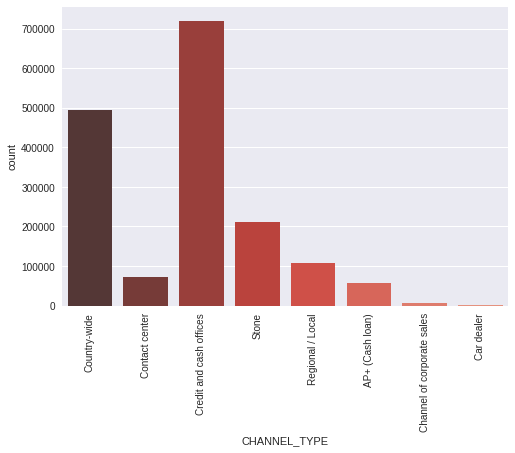

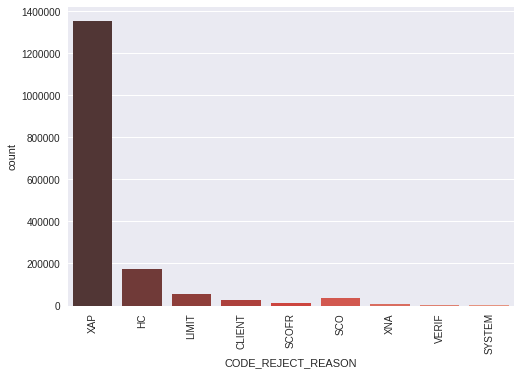

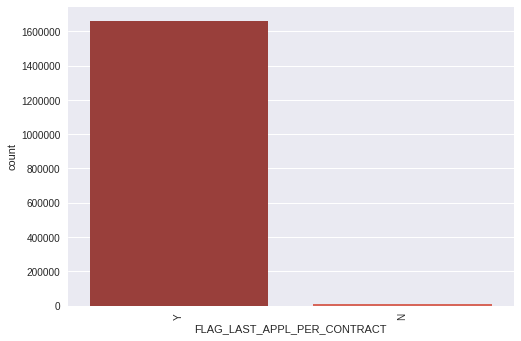

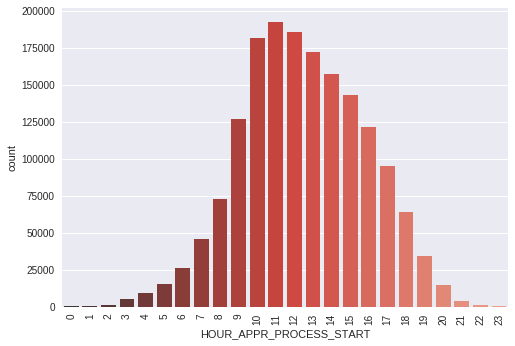

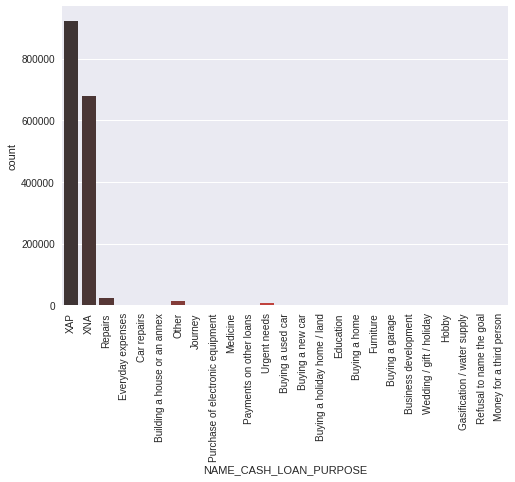

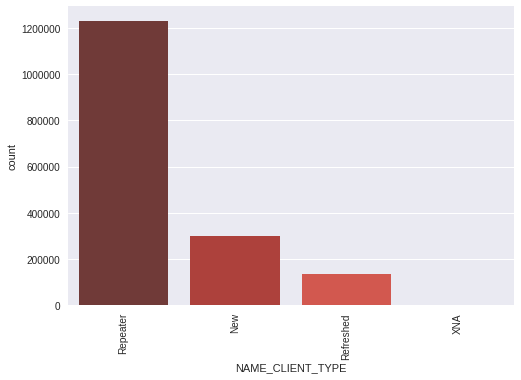

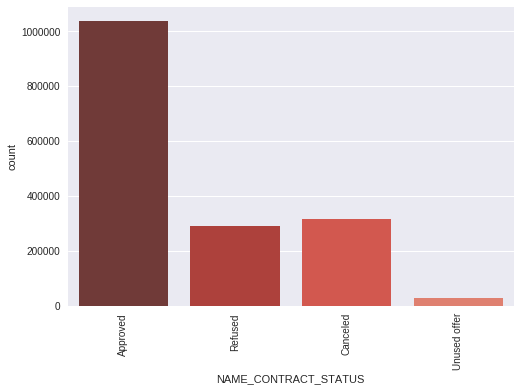

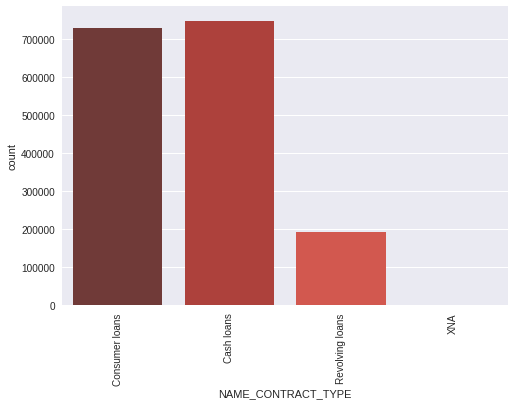

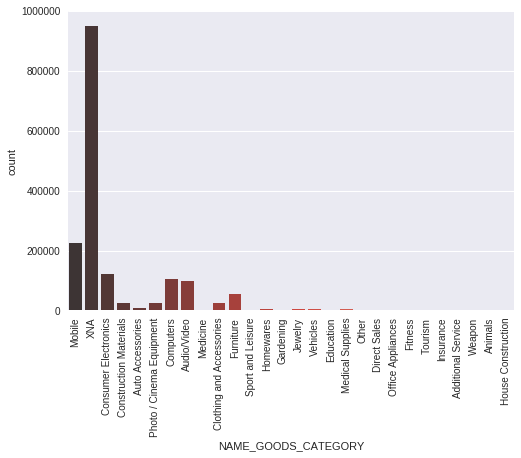

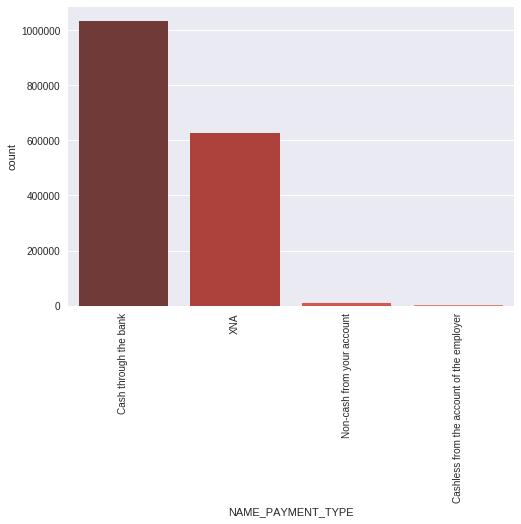

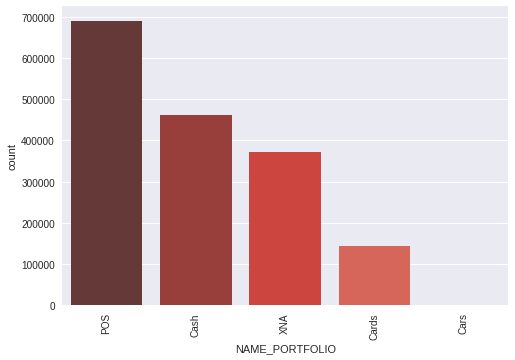

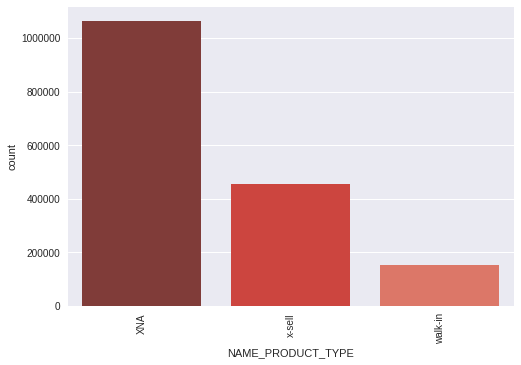

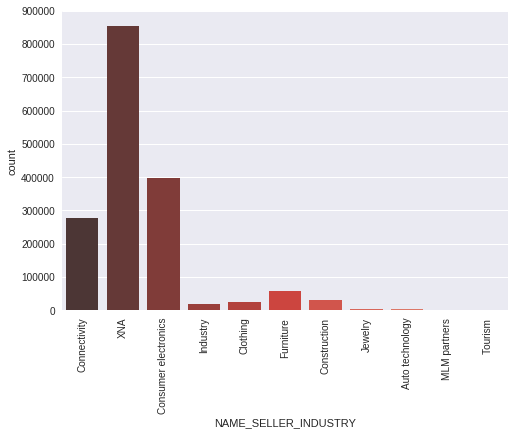

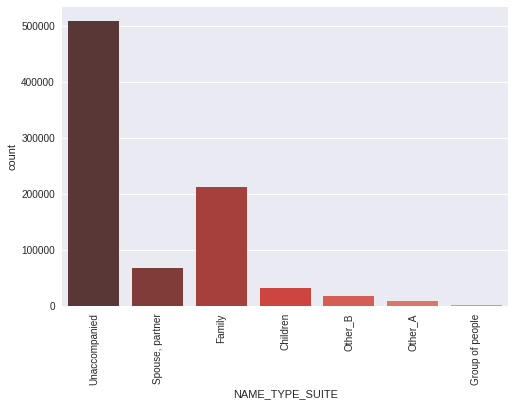

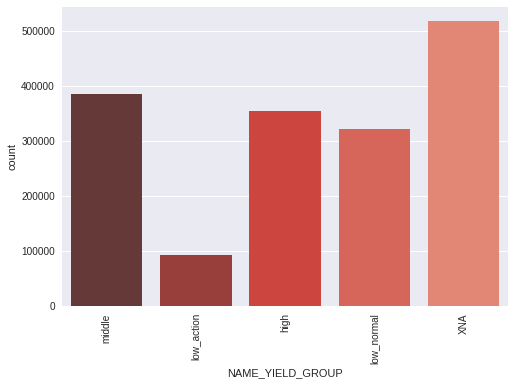

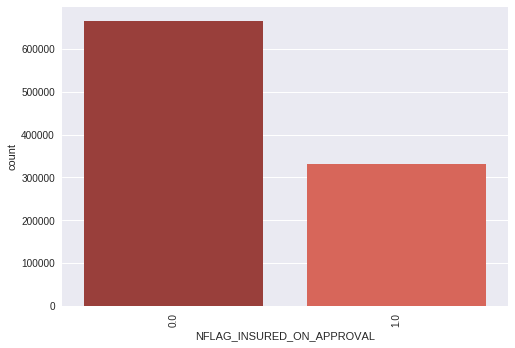

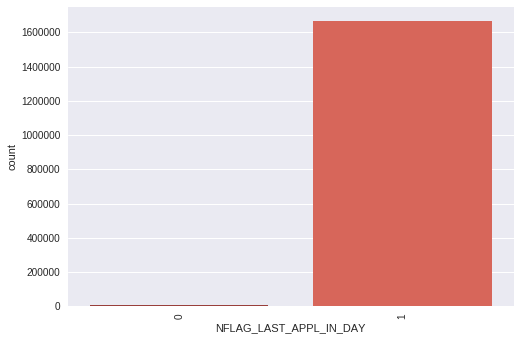

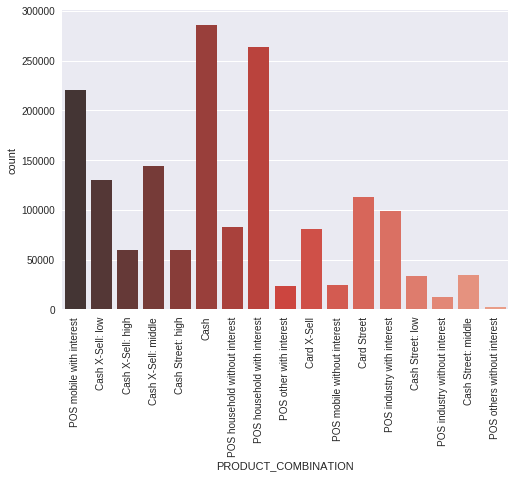

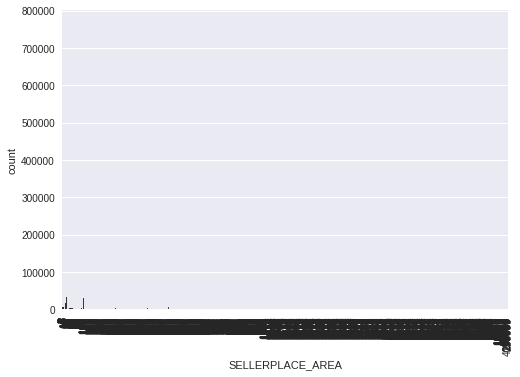

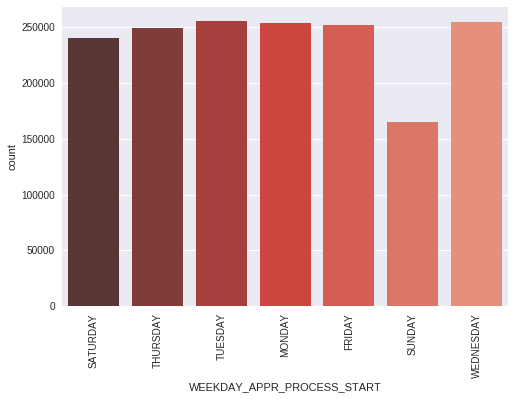

CPU times: user 38.9 s, sys: 3.78 s, total: 42.7 s
Wall time: 39 s


In [0]:
# Deciding what features that we should transform by one-hot encoding (ohe)
%%time
cols= ['CHANNEL_TYPE', # good structure, client's interaction channel -> ohe
       'CODE_REJECT_REASON', # unbalanced structure between values
       
       'HOUR_APPR_PROCESS_START', # appear densely in working hours, it's obvious
       
       'NAME_CASH_LOAN_PURPOSE', # unbalanced structure between values, a lot of uncategorized values
       'NAME_CLIENT_TYPE', # good structure -> ohe
       'NAME_CONTRACT_STATUS', # good structure, shows status of contract -> ohe
       'NAME_CONTRACT_TYPE', # good structure, show type of contract -> ohe
       'NAME_GOODS_CATEGORY',# unbalanced structure between values, a lot of uncategorized values
       'NAME_PAYMENT_TYPE', # unbalanced structure between values, a lot of uncategorized values
       'NAME_PORTFOLIO', # valuable feature -> ohe
       'NAME_PRODUCT_TYPE', # valuable feature -> ohe
       'NAME_SELLER_INDUSTRY',# unbalanced structure between values, a lot of uncategorized values
       'NAME_TYPE_SUITE', # valuable feature, without uncategorized values -> ohe
       'NAME_YIELD_GROUP', # valuable feature, show client's money status -> ohe
       
       'FLAG_LAST_APPL_PER_CONTRACT', # contains Y,N, valuable feature
       'NFLAG_INSURED_ON_APPROVAL', # contains 0,1, valuable feature
       'NFLAG_LAST_APPL_IN_DAY', 
       'PRODUCT_COMBINATION', # good structure,valuable feature -> ohe
       'SELLERPLACE_AREA', 
       'WEEKDAY_APPR_PROCESS_START' # it's obvious
      ]
plot_categorical(cols,None,df_pre)

#         'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'CHANNEL_TYPE',
#         'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
#         'NAME_PRODUCT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO'

# Continous


In [0]:
cons_cols.sort()
df_explore_cate = statistical_analyzing(df_pre[cons_cols])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(cons_cols)
  print(df_explore_cate)

No. observations: 1670214
No. features: 15
['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']
                          col_type         n_unique            n_miss  \
name                                                                    
AMT_ANNUITY                float64  357959 (21.43%)   372235 (22.29%)   
AMT_APPLICATION            float64    93885 (5.62%)         0 (0.00%)   
AMT_CREDIT                 float64    86803 (5.20%)         1 (0.00%)   
AMT_DOWN_PAYMENT           float64    29278 (1.75%)   895844 (53.64%)   
AMT_GOODS_PRICE            float64    93885 (5.62%)   385515 (23.08%)   
CNT_PAYMENT                float64       49 (0.00%)   372230 (22.29%)   
DAYS_DECISION                int64     2922 (0.17%)         0 (0.00%)   


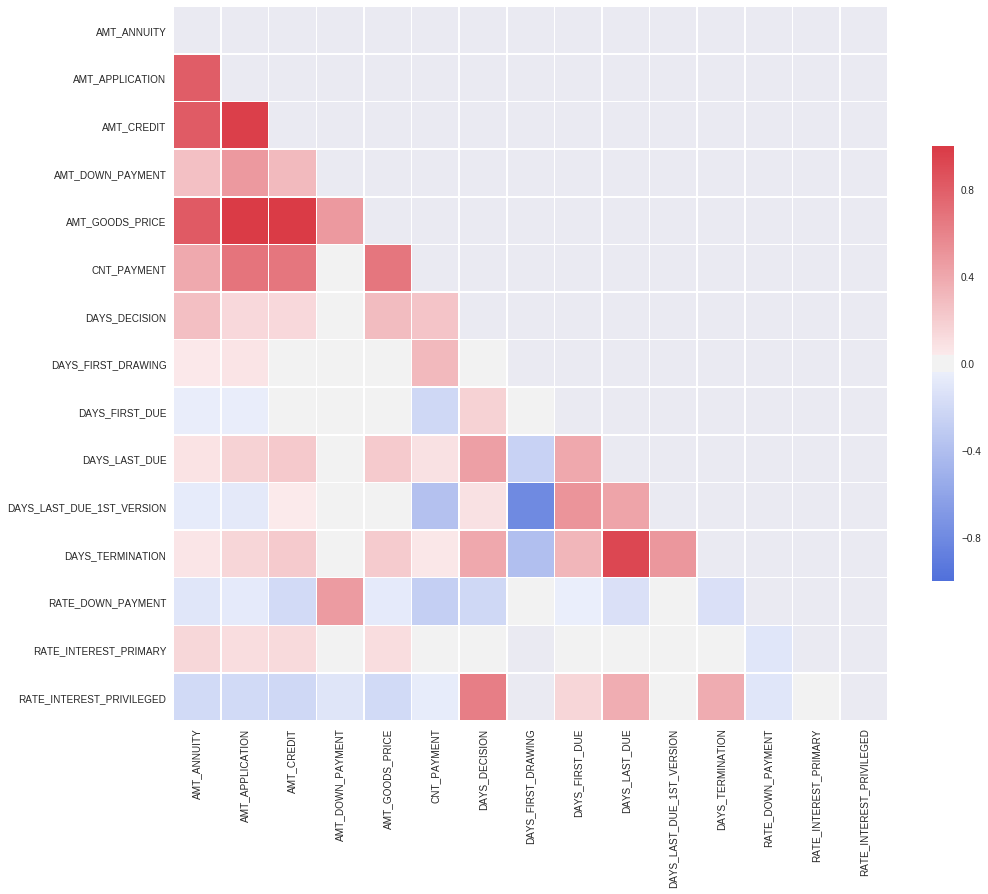

In [0]:
correlations = df_pre[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#correlations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Column name: AMT_ANNUITY
> No.outliner: 82762 



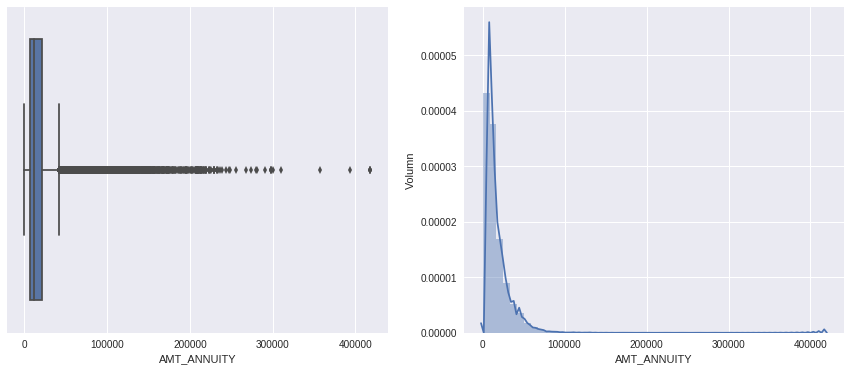

Column name: AMT_APPLICATION
> No.outliner: 208019 



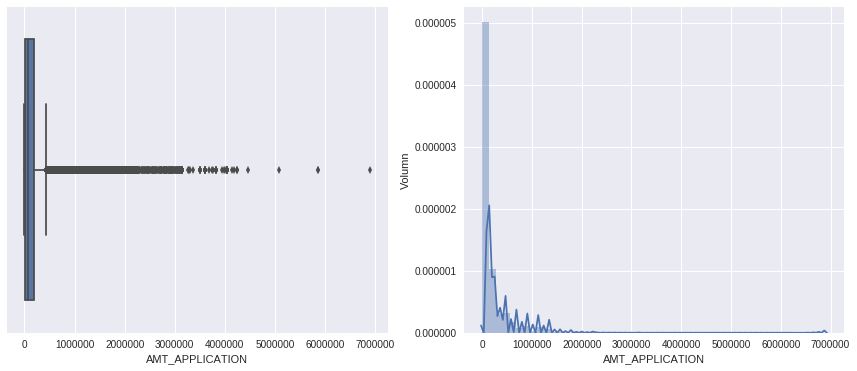

Column name: AMT_CREDIT
> No.outliner: 179989 



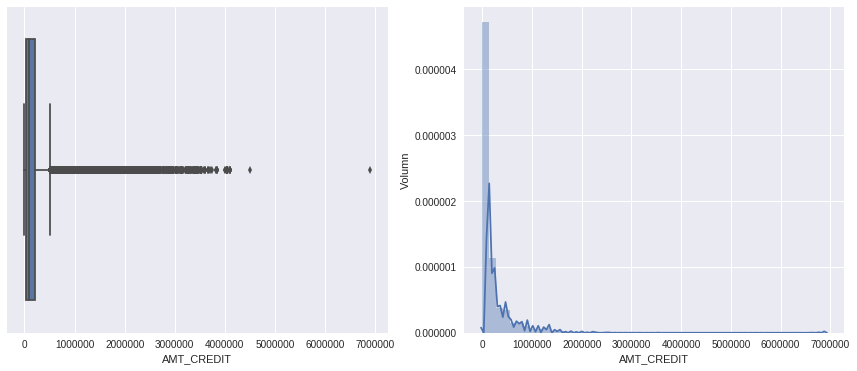

Column name: AMT_DOWN_PAYMENT
> No.outliner: 64402 



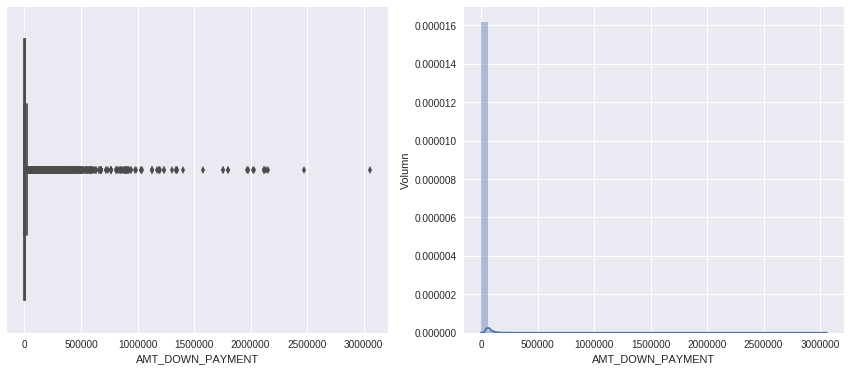

Column name: AMT_GOODS_PRICE
> No.outliner: 145715 



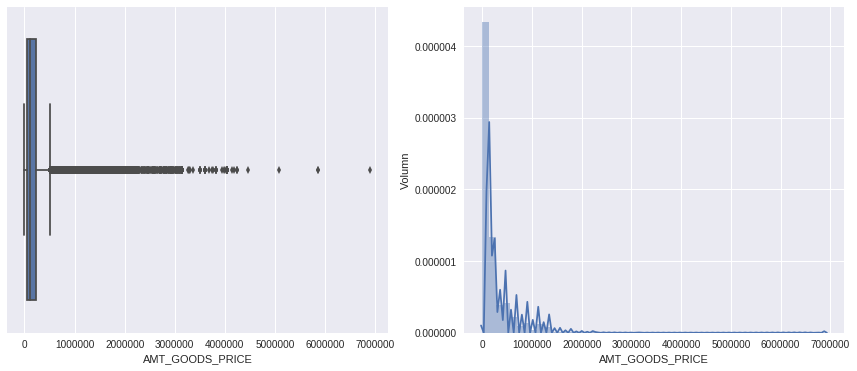

Column name: CNT_PAYMENT
> No.outliner: 55903 



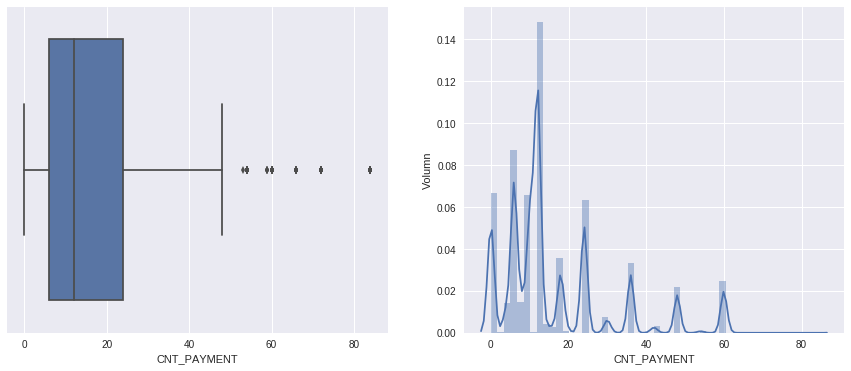

Column name: DAYS_DECISION
> No.outliner: 17571 



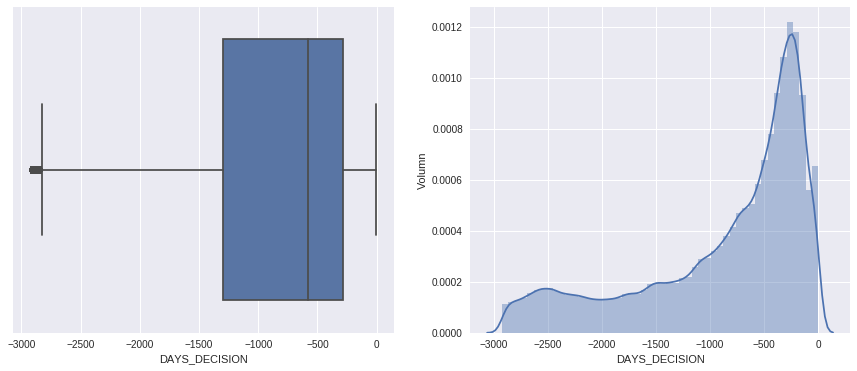

Column name: DAYS_FIRST_DRAWING
> No.outliner: 62705 



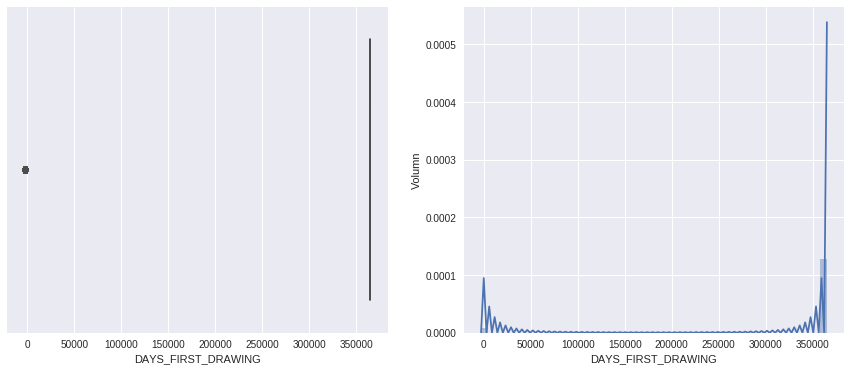

Column name: DAYS_FIRST_DUE
> No.outliner: 40645 



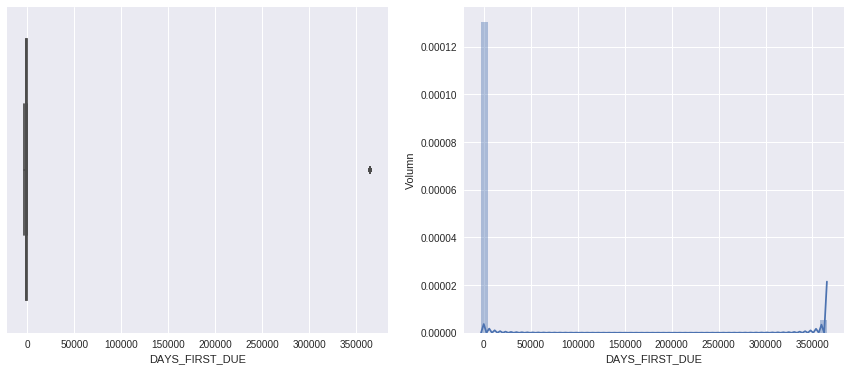

Column name: DAYS_LAST_DUE
> No.outliner: 211221 



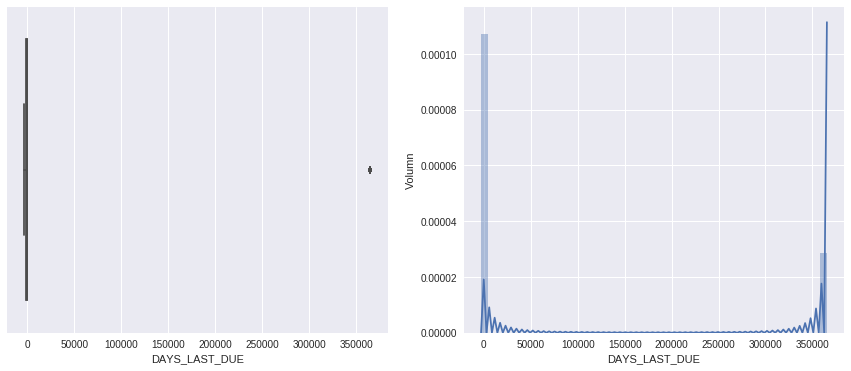

Column name: DAYS_LAST_DUE_1ST_VERSION
> No.outliner: 93865 



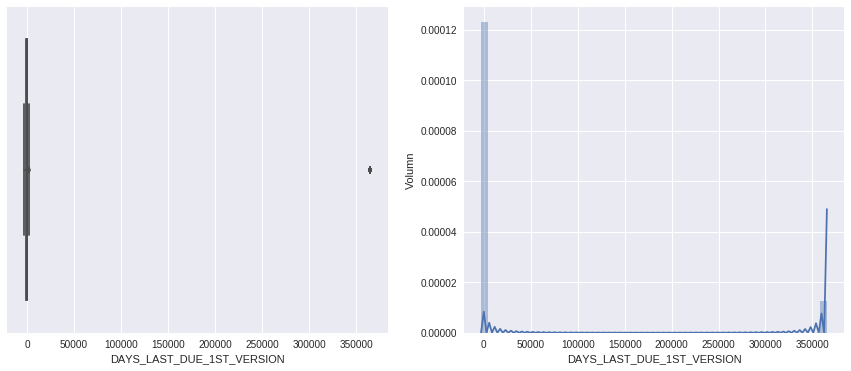

Column name: DAYS_TERMINATION
> No.outliner: 225913 



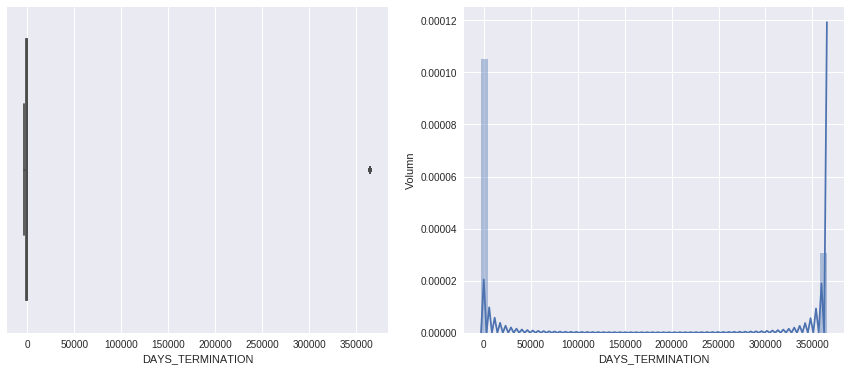

Column name: RATE_DOWN_PAYMENT
> No.outliner: 43162 



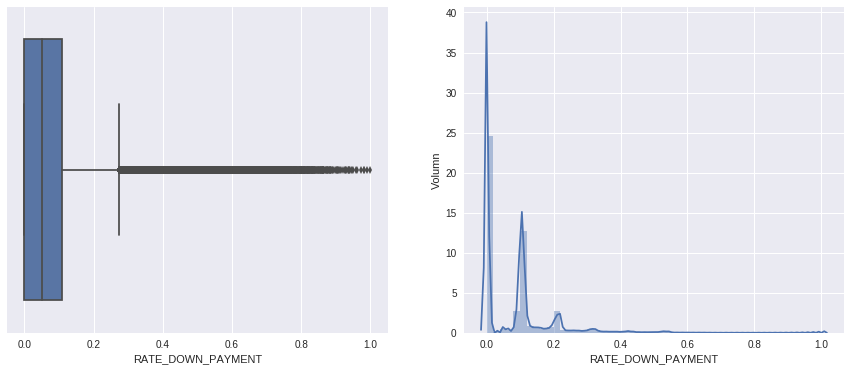

Column name: RATE_INTEREST_PRIMARY
> No.outliner: 234 



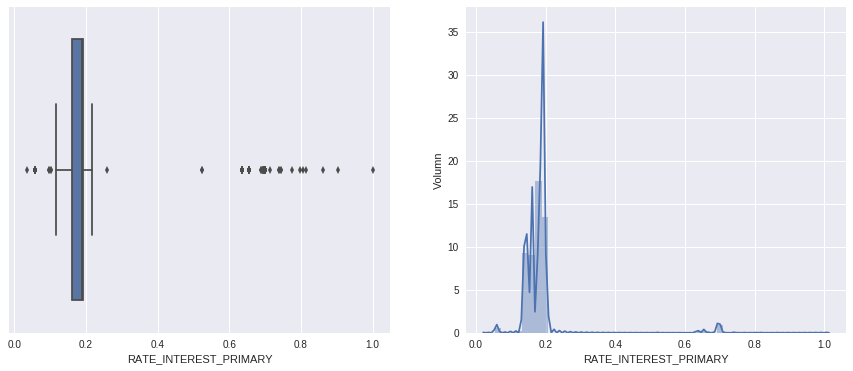

Column name: RATE_INTEREST_PRIVILEGED
> No.outliner: 72 



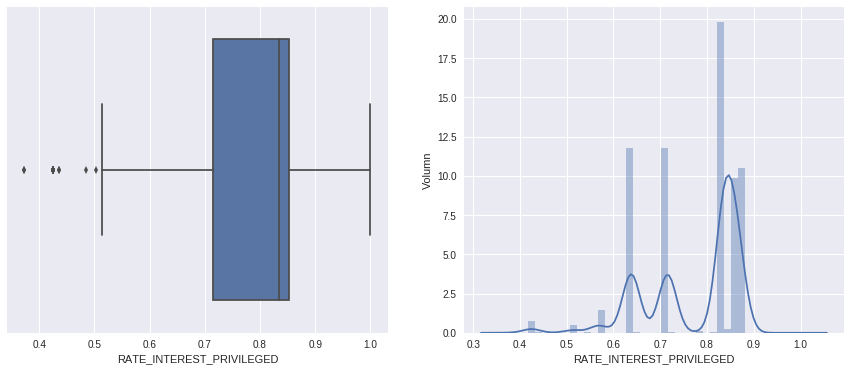

In [0]:
cols = cons_cols
plot_continous(cols, None, df_pre)
# ['AMT_ANNUITY', tiền thường niên (thu nhập)
# 'AMT_APPLICATION', tiền đăng kí
# 'AMT_CREDIT', tiền tín dụng
# 'AMT_DOWN_PAYMENT', # tiền đặt cọc > correlated to RATE_DOWN_PAYMENT
#  'AMT_GOODS_PRICE', tiền hàng hóa
 
#  'CNT_PAYMENT', đếm số lần chi trả (counting the no payment) > high correlation
# với các cột AMT_ và DAYS_DECISION
 
#  'DAYS_DECISION', # số ngày suy nghĩ
# 'DAYS_FIRST_DRAWING', # ngày chi trả đầu tiên
# 'DAYS_FIRST_DUE', # 1st due day (ngày đáo hạn)
# 'DAYS_LAST_DUE',  # last due day
#  'DAYS_LAST_DUE_1ST_VERSION', # last due day of 1st version
# 'DAYS_TERMINATION',  # cancellation day > use max
 
#  'RATE_DOWN_PAYMENT', 
# 'RATE_INTEREST_PRIMARY', 
# 'RATE_INTEREST_PRIVILEGED' high correlated to DAYS_DECISION]

# Cleaning

In [0]:

def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping to generate new feature and then merging into origin df"""
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
cons_cols

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_TERMINATION',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [0]:
def get_previous_applications(path, num_rows= None):
    """ Process previous_application.csv and return a pandas dataframe. """
    prev = pd.read_csv(os.path.join(path, 'previous_application.csv'), nrows= num_rows)

    # One-hot encode most important categorical features -> 85 cols
    ohe_columns = [
        'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'CHANNEL_TYPE',
        'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
        'NAME_PRODUCT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
           'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_INSURED_ON_APPROVAL']
    prev, cat_cols = one_hot_encoder(prev, ohe_columns, nan_as_category= False)
    
    
    # Change 365.243 values to nan (missing) 
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    
    # Grouping by SK_ID_PREV
    # Categorical features
    cat_agg = {key: ['mean'] for key in cat_cols}
    # Perform general aggregations
    PREVIOUS_AGG = {
    'SK_ID_PREV': ['size','nunique'],
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'AMT_DOWN_PAYMENT': ['max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['max', 'mean'],
    'RATE_INTEREST_PRIMARY': ['max', 'mean'],
    'RATE_INTEREST_PRIVILEGED': ['max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['max'],
    'DAYS_LAST_DUE': ['max'],       
    'CNT_PAYMENT': ['max', 'mean'],
    'DAYS_TERMINATION': ['max'],}
    
    agg_prev = group(prev, 'PREV_', {**PREVIOUS_AGG, **cat_agg})
    

    return agg_prev

# FE
**previous_application**: 
- Contains 1,670,214 entries, total 37 columns
- previous applications for loans at Home Credit of clients who have loans in the application data. 
- Each current loan in the application data can have multiple previous loans. 
- Each previous application has one row and is identified by the feature SK_ID_PREV. 
- chứa các cột phân loại quan trọng 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE'... (hơn các table phụ khác)

**FE**
- Feature Selection is done
- Feature extraction
  - Generating features based on internal data
  - Generating features based on external data
    - Kết nối với installment table, để tìm các khoảng thông tin về tỷ lệ chi trả và số tiền của những khách hàng contract_status là approved và có LAST_DUE_DAY là vô tận (có thể hiểu chưa hoàn thành)      
- Techniques: 
  - Transformation: Square, Square-Root, Power, Max, Min, Median, Mean, Var ...
  - Feature Calculation: Sum, Minus (Difference), Ratio (Division), Multiplication. Trọng tâm là lấy thông tin về tín dụng của khách hàng trong quá khứ, -> các hệ số khác nên được xây dựng dựa trên feature: 'AMT_CREDIT' 
  - Groupby: 
    - Category feature, 
    - Time-based feature, 'DAYS_DECISION' -> xét theo tháng , days past due (DPD) = DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT
    - Trending feature, Social Network feature.
- Domain knowledge features
    - Payment history
      - AMT_ : 
      

In [0]:
""" INITIAL CATEGORICAL FEATURES
'CHANNEL_TYPE', # good structure, client's interaction channel -> ohe
'CODE_REJECT_REASON', # unbalanced structure between values

'HOUR_APPR_PROCESS_START', # appear densely in working hours, it's obvious

'NAME_CASH_LOAN_PURPOSE', # unbalanced structure between values, a lot of uncategorized values
'NAME_CLIENT_TYPE', # good structure -> ohe
'NAME_CONTRACT_STATUS', # tình trạng hợp đồng Approved 60%/ Refused/ Cenceled/ Unsed offer
    good structure, shows status of contract -> ohe

'NAME_CONTRACT_TYPE', # good structure, show type of contract -> ohe
'NAME_GOODS_CATEGORY',# unbalanced structure between values, a lot of uncategorized values
'NAME_PAYMENT_TYPE', # unbalanced structure between values, a lot of uncategorized values
'NAME_PORTFOLIO', # valuable feature -> ohe
'NAME_PRODUCT_TYPE', # valuable feature -> ohe
'NAME_SELLER_INDUSTRY',# unbalanced structure between values, a lot of uncategorized values
'NAME_TYPE_SUITE', # valuable feature, without uncategorized values -> ohe
'NAME_YIELD_GROUP', # valuable feature, show client's money status -> ohe

'FLAG_LAST_APPL_PER_CONTRACT', # contains Y,N, valuable feature
'NFLAG_INSURED_ON_APPROVAL', # contains 0,1, valuable feature
'NFLAG_LAST_APPL_IN_DAY', 
'PRODUCT_COMBINATION', # good structure,valuable feature -> ohe
'SELLERPLACE_AREA', 
'WEEKDAY_APPR_PROCESS_START' # it's obvious, ít nhất vào chủ nhật và gần như 
  bằng nhau vào các ngày còn lại
"""

In [0]:
""" INITIAL CONTINOUS FEATURES
'AMT_ANNUITY', tiền thường niên (thẻ)
'AMT_APPLICATION', tiền sử dụng
'AMT_CREDIT', tiền tín dụng *
'AMT_DOWN_PAYMENT', tiền đặt cọc > correlated to RATE_DOWN_PAYMENT
'AMT_GOODS_PRICE', tiền hàng hóa > significantly correlated to others
 
'CNT_PAYMENT', đếm số lần chi trả (counting the no payment) > high correlation
  với các cột AMT_ và DAYS_DECISION
 
'DAYS_DECISION', # số ngày suy nghĩ - có giá trị 365243
'DAYS_FIRST_DRAWING', # ngày chi trả đầu tiên - có giá trị 365243
'DAYS_FIRST_DUE', # 1st due day (ngày đáo hạn) - có giá trị 365243
'DAYS_LAST_DUE',  # last due day - có giá trị 365243
'DAYS_LAST_DUE_1ST_VERSION', # last due day of 1st version - có giá trị 365243
'DAYS_TERMINATION',  # cancellation day > use max - có giá trị 365243
 
'RATE_DOWN_PAYMENT', 
'RATE_INTEREST_PRIMARY', 
'RATE_INTEREST_PRIVILEGED' high correlated to DAYS_DECISION]
"""

In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
pay = pd.read_csv(os.path.join(DATA_DIRECTORY, 'installments_payments.csv'), nrows= None)

In [0]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
prev = df_pre.copy()

# One-hot encode most important categorical features -> 85 cols
ohe_columns = [
    'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'CHANNEL_TYPE',
    'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
    'NAME_PRODUCT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_INSURED_ON_APPROVAL']
prev, cat_cols = one_hot_encoder(prev, ohe_columns, nan_as_category= False)

In [0]:
"""DOMAIN KNOWLEDGE FEATURES - exploring about PAYMENT HISTORY
lấy các chỉ số xoay xung quanh AMT_CREDIT, để khai thác hết thông tin về khoảng credit
'AMT_ANNUITY', tiền thường niên (thẻ)
'AMT_APPLICATION', tiền mong có trong thẻ để sử dụng
'AMT_CREDIT', tiền tín dụng *
'AMT_DOWN_PAYMENT', tiền đặt cọc > correlated to RATE_DOWN_PAYMENT
'AMT_GOODS_PRICE', tiền mua hàng hóa > significantly correlated to others
 
'CNT_PAYMENT', đếm số lần chi trả (counting the no payment) > high correlation
  với các cột AMT_ và DAYS_DECISION
  
'RATE_DOWN_PAYMENT', 
'RATE_INTEREST_PRIMARY', 
'RATE_INTEREST_PRIVILEGED' high correlated to DAYS_DECISION]
>>>>
APPLICATION_CREDIT_DIFF show the gap between amount-application and amt-credit

"""
# Feature engineering: ratios and difference
prev['APPLICATION_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
prev['APPLICATION_CREDIT_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
prev['CREDIT_TO_ANNUITY_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_ANNUITY']
prev['DOWN_PAYMENT_TO_CREDIT'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']
prev['DOWN_PAYMENT_TO_ANNUITY'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_ANNUITY']

# Interest ratio on previous application (simplified)
prev['TOTAL_PAYMENT'] = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
prev['SIMPLE_INTERESTS'] = (prev['TOTAL_PAYMENT']/prev['AMT_CREDIT'] - 1)/prev['CNT_PAYMENT']

In [0]:
""" CATEGORIES
Connecting with install_payment.csv to take all informations 
related to previous PAYMENT of clients who had approved loans and not complete yet"""

# Active loans - approved and not complete yet (last_due 365243)
approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
active_df = approved[approved['DAYS_LAST_DUE'] == 365243]
# Find how much was already payed in active loans (using installments csv)
active_pay = pay[pay['SK_ID_PREV'].isin(active_df['SK_ID_PREV'])]
active_pay_agg = active_pay.groupby('SK_ID_PREV')[['AMT_INSTALMENT', 'AMT_PAYMENT']].sum()
active_pay_agg.reset_index(inplace= True)    
# Active loans: difference of what was payed and installments
active_pay_agg['INSTALMENT_PAYMENT_DIFF'] = (active_pay_agg['AMT_INSTALMENT'] - active_pay_agg['AMT_PAYMENT'])
# Merge with active_df
active_df = active_df.merge(active_pay_agg, on= 'SK_ID_PREV', how= 'left')
active_df['REMAINING_DEBT'] = active_df['AMT_CREDIT'] - active_df['AMT_PAYMENT']
active_df['REPAYMENT_RATIO'] = active_df['AMT_PAYMENT'] / active_df['AMT_CREDIT']
# Perform aggregations for active applications
PREVIOUS_ACTIVE_AGG = {
    'SK_ID_PREV': ['nunique'],
    'SIMPLE_INTERESTS': ['mean'],
    'AMT_ANNUITY': ['max', 'sum'],
    'AMT_APPLICATION': ['max', 'mean'],
    'AMT_CREDIT': ['sum'],
    'AMT_DOWN_PAYMENT': ['max', 'mean'],
    'DAYS_DECISION': ['min', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
    # Engineered features
    'AMT_PAYMENT': ['sum'],
    'INSTALMENT_PAYMENT_DIFF': ['mean', 'max'],
    'REMAINING_DEBT': ['max', 'mean', 'sum'],
    'REPAYMENT_RATIO': ['mean'],}
active_agg_df = group(active_df, 'PREV_ACTIVE_', PREVIOUS_ACTIVE_AGG)
active_agg_df['TOTAL_REPAYMENT_RATIO'] = (active_agg_df['PREV_ACTIVE_AMT_PAYMENT_SUM'] /
                                         active_agg_df['PREV_ACTIVE_AMT_CREDIT_SUM'])
del active_pay, active_pay_agg, active_df; gc.collect()

In [0]:
active_pay_agg.shape

(172583, 3)

In [0]:
# Aggregations for approved and refused loans
PREVIOUS_APPROVED_AGG = {        
    'SK_ID_PREV': ['nunique'],
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'AMT_DOWN_PAYMENT': ['max'],
    'AMT_GOODS_PRICE': ['max'],
    'HOUR_APPR_PROCESS_START': ['min', 'max'],
    'DAYS_DECISION': ['min', 'mean'],
    'CNT_PAYMENT': ['max', 'mean'],
    'DAYS_TERMINATION': ['mean'],
    # Engineered features
    'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
    'APPLICATION_CREDIT_DIFF': ['max'],
    'APPLICATION_CREDIT_RATIO': ['min', 'max', 'mean'],
    # The following features are only for approved applications
    'DAYS_FIRST_DRAWING': ['max', 'mean'],
    'DAYS_FIRST_DUE': ['min', 'mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
    'DAYS_LAST_DUE': ['max', 'mean'],
    'DAYS_LAST_DUE_DIFF': ['min', 'max', 'mean'],
    'SIMPLE_INTERESTS': ['min', 'max', 'mean'],    }
agg_prev = group_and_merge(approved, agg_prev, 'APPROVED_', PREVIOUS_APPROVED_AGG)
refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    PREVIOUS_REFUSED_AGG = {
    'AMT_APPLICATION': ['max', 'mean'],
    'AMT_CREDIT': ['min', 'max'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['max', 'mean'],
    # Engineered features
    'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean', 'var'],
    'APPLICATION_CREDIT_RATIO': ['min', 'mean'],
    'NAME_CONTRACT_TYPE_Consumer loans': ['mean'],
    'NAME_CONTRACT_TYPE_Cash loans': ['mean'],
    'NAME_CONTRACT_TYPE_Revolving loans': ['mean'],    }
agg_prev = group_and_merge(refused, agg_prev, 'REFUSED_', PREVIOUS_REFUSED_AGG)
# agg_prev.shape
# agg_prev.head()
# refused.shape

In [0]:
"""
PREVIOUS APPLICATION
"""
def get_previous_applications_3(path, num_rows= None):
  """ Process previous_application.csv and return a pandas dataframe. """
  prev = pd.read_csv(os.path.join(path, 'previous_application.csv'), nrows= num_rows)
  pay = pd.read_csv(os.path.join(path, 'installments_payments.csv'), nrows= num_rows)

  # One-hot encode most important categorical features -> 85 cols
  ohe_columns = [
      'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'CHANNEL_TYPE',
      'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
      'NAME_PRODUCT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
         'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_INSURED_ON_APPROVAL']
  prev, cat_cols = one_hot_encoder(prev, ohe_columns, nan_as_category= False)

  # Feature engineering: ratios and difference
  prev['APPLICATION_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
  prev['APPLICATION_CREDIT_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
  prev['CREDIT_TO_ANNUITY_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_ANNUITY']
  prev['DOWN_PAYMENT_TO_CREDIT'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']
  prev['DOWN_PAYMENT_TO_ANNUITY'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_ANNUITY']

  # Interest ratio on previous application (simplified)
  prev['TOTAL_PAYMENT'] = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
  prev['SIMPLE_INTERESTS'] = (prev['TOTAL_PAYMENT']/prev['AMT_CREDIT'] - 1)/prev['CNT_PAYMENT']

  """
  Connecting with install_payment.csv to take all informations 
  related to previous PAYMENT of clients who had approved loans and not complete yet"""
  # Active loans - approved and not complete yet (last_due 365243)
  approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
  active_df = approved[approved['DAYS_LAST_DUE'] == 365243]
  # Find how much was already payed in active loans (using installments csv)
  active_pay = pay[pay['SK_ID_PREV'].isin(active_df['SK_ID_PREV'])]
  active_pay_agg = active_pay.groupby('SK_ID_PREV')[['AMT_INSTALMENT', 'AMT_PAYMENT']].sum()
  active_pay_agg.reset_index(inplace= True)    
  # Active loans: difference of what was payed and installments
  active_pay_agg['INSTALMENT_PAYMENT_DIFF'] = active_pay_agg['AMT_INSTALMENT'] - active_pay_agg['AMT_PAYMENT']
  # Merge with active_df
  active_df = active_df.merge(active_pay_agg, on= 'SK_ID_PREV', how= 'left')
  active_df['REMAINING_DEBT'] = active_df['AMT_CREDIT'] - active_df['AMT_PAYMENT']
  active_df['REPAYMENT_RATIO'] = active_df['AMT_PAYMENT'] / active_df['AMT_CREDIT']
  # Perform aggregations for active applications
  PREVIOUS_ACTIVE_AGG = {
      'SK_ID_PREV': ['nunique'],
      'SIMPLE_INTERESTS': ['mean'],
      'AMT_ANNUITY': ['max', 'sum'],
      'AMT_APPLICATION': ['max', 'mean'],
      'AMT_CREDIT': ['sum'],
      'AMT_DOWN_PAYMENT': ['max', 'mean'],
      'DAYS_DECISION': ['min', 'mean'],
      'CNT_PAYMENT': ['mean', 'sum'],
      'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
      # Engineered features
      'AMT_PAYMENT': ['sum'],
      'INSTALMENT_PAYMENT_DIFF': ['mean', 'max'],
      'REMAINING_DEBT': ['max', 'mean', 'sum'],
      'REPAYMENT_RATIO': ['mean'],}
  active_agg_df = group(active_df, 'PREV_ACTIVE_', PREVIOUS_ACTIVE_AGG)
  active_agg_df['TOTAL_REPAYMENT_RATIO'] = (active_agg_df['PREV_ACTIVE_AMT_PAYMENT_SUM'] /
                                           active_agg_df['PREV_ACTIVE_AMT_CREDIT_SUM'])
  del active_pay, active_pay_agg, active_df; gc.collect()

  # Change 365.243 values to nan (missing) 
  prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
  prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
  prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
  prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
  prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
  # Days last due difference (scheduled x done)
  prev['DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
  approved['DAYS_LAST_DUE_DIFF'] = approved['DAYS_LAST_DUE_1ST_VERSION'] - approved['DAYS_LAST_DUE']

  # Grouping by SK_ID_PREV
  # Categorical features
  cat_agg = {key: ['mean'] for key in cat_cols}
  # Perform general aggregations
  PREVIOUS_AGG = {        
      'SK_ID_PREV': ['size','nunique'],
      'AMT_ANNUITY': ['min', 'max', 'mean'],
      'AMT_APPLICATION': ['min', 'max', 'mean'],
      'AMT_CREDIT': ['min', 'max', 'mean'],
      'AMT_DOWN_PAYMENT': ['max', 'mean'],
      'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
      'RATE_DOWN_PAYMENT': ['max', 'mean'],
      'RATE_INTEREST_PRIMARY': ['max', 'mean'],
      'RATE_INTEREST_PRIVILEGED': ['max', 'mean'],
      'DAYS_DECISION': ['min', 'max', 'mean'],
      'DAYS_LAST_DUE_1ST_VERSION': ['max'],
      'DAYS_LAST_DUE': ['max'],       
      'CNT_PAYMENT': ['max', 'mean'],
      'DAYS_TERMINATION': ['max', 'mean'],
      # new features
      'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
      'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean'],
      'APPLICATION_CREDIT_RATIO': ['min', 'max', 'mean', 'var'],
      'DOWN_PAYMENT_TO_CREDIT': ['mean'],
      'DOWN_PAYMENT_TO_ANNUITY': ['mean'],   }    
  agg_prev = group(prev, 'PREV_', {**PREVIOUS_AGG, **cat_agg})

  """ Merge active loans dataframe on agg_prev """
  agg_prev = agg_prev.merge(active_agg_df, how='left', on='SK_ID_CURR')
  del active_agg_df; gc.collect()

  """ CATEGORICAL GROUPBY """
  # Aggregations for approved and refused loans
  PREVIOUS_APPROVED_AGG = {        
      'SK_ID_PREV': ['nunique'],
      'AMT_ANNUITY': ['min', 'max', 'mean'],
      'AMT_CREDIT': ['min', 'max', 'mean'],
      'AMT_DOWN_PAYMENT': ['max'],
      'AMT_GOODS_PRICE': ['max'],
      'HOUR_APPR_PROCESS_START': ['min', 'max'],
      'DAYS_DECISION': ['min', 'mean'],
      'CNT_PAYMENT': ['max', 'mean'],
      'DAYS_TERMINATION': ['mean'],
      # Engineered features
      'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
      'APPLICATION_CREDIT_DIFF': ['max'],
      'APPLICATION_CREDIT_RATIO': ['min', 'max', 'mean'],
      # The following features are only for approved applications
      'DAYS_FIRST_DRAWING': ['max', 'mean'],
      'DAYS_FIRST_DUE': ['min', 'mean'],
      'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
      'DAYS_LAST_DUE': ['max', 'mean'],
      'DAYS_LAST_DUE_DIFF': ['min', 'max', 'mean'],
      'SIMPLE_INTERESTS': ['min', 'max', 'mean'],    }
  agg_prev = group_and_merge(approved, agg_prev, 'APPROVED_', PREVIOUS_APPROVED_AGG)
  refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
  PREVIOUS_REFUSED_AGG = {
      'AMT_APPLICATION': ['max', 'mean'],
      'AMT_CREDIT': ['min', 'max'],
      'DAYS_DECISION': ['min', 'max', 'mean'],
      'CNT_PAYMENT': ['max', 'mean'],
      # Engineered features
      'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean', 'var'],
      'APPLICATION_CREDIT_RATIO': ['min', 'mean'],
      'NAME_CONTRACT_TYPE_Consumer loans': ['mean'],
      'NAME_CONTRACT_TYPE_Cash loans': ['mean'],
      'NAME_CONTRACT_TYPE_Revolving loans': ['mean'],    }
  agg_prev = group_and_merge(refused, agg_prev, 'REFUSED_', PREVIOUS_REFUSED_AGG)
  del approved, refused; gc.collect()

  # Aggregations for Consumer loans and Cash loans
  for loan_type in ['Consumer loans', 'Cash loans']:
      type_df = prev[prev['NAME_CONTRACT_TYPE_{}'.format(loan_type)] == 1]
      PREVIOUS_LOAN_TYPE_AGG = {            
          'AMT_CREDIT': ['sum'],
          'AMT_ANNUITY': ['mean', 'max'],
          'SIMPLE_INTERESTS': ['min', 'mean', 'max', 'var'],
          'APPLICATION_CREDIT_DIFF': ['min', 'var'],
          'APPLICATION_CREDIT_RATIO': ['min', 'max', 'mean'],
          'DAYS_DECISION': ['max'],
          'DAYS_LAST_DUE_1ST_VERSION': ['max', 'mean'],
          'CNT_PAYMENT': ['mean'],        }
      prefix = 'PREV_' + loan_type.split(" ")[0] + '_'
      agg_prev = group_and_merge(type_df, agg_prev, prefix, PREVIOUS_LOAN_TYPE_AGG)
      del type_df; gc.collect()
      
  """ TIME_BASED """
  # Get the SK_ID_PREV for loans with late payments (days past due)
  pay['DPD'] = pay['DAYS_ENTRY_PAYMENT'] - pay['DAYS_INSTALMENT']
  pay['FLAG_LATE_PAYMENT'] = np.where(pay['DPD'] > 0, 1, 0)
  #pay['LATE_PAYMENT'] = pay['LATE_PAYMENT'].apply(lambda x: 1 if x > 0 else 0)
  dpd_id = pay[pay['FLAG_LATE_PAYMENT'] > 0]['SK_ID_PREV'].unique()
  # Aggregations for loans with late payments    
  PREVIOUS_LATE_PAYMENTS_AGG = {        
      'DAYS_DECISION': ['min', 'max', 'mean'],
      'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
      # Engineered features
      'APPLICATION_CREDIT_DIFF': ['min'],
      'NAME_CONTRACT_TYPE_Consumer loans': ['mean'],
      'NAME_CONTRACT_TYPE_Cash loans': ['mean'],
      'NAME_CONTRACT_TYPE_Revolving loans': ['mean'],    }
  agg_dpd = group_and_merge(prev[prev['SK_ID_PREV'].isin(dpd_id)], agg_prev,
                                  'PREV_LATE_', PREVIOUS_LATE_PAYMENTS_AGG)
  del agg_dpd, dpd_id; gc.collect()

  # Aggregations for loans in the last x months
  for time_frame in [12, 24]:    
    time_frame_df = prev[prev['DAYS_DECISION'] >= -30*time_frame]
    prefix = 'PREV_LAST{}M_'.format(time_frame)
    PREVIOUS_TIME_AGG = {                        
        'AMT_CREDIT': ['sum'],
        'AMT_ANNUITY': ['mean', 'max'],
        'SIMPLE_INTERESTS': ['mean', 'max'],
        'DAYS_DECISION': ['min', 'mean'],
        'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean'],
        # Engineered features
        'APPLICATION_CREDIT_DIFF': ['min'],
        'APPLICATION_CREDIT_RATIO': ['min', 'max', 'mean'],
        'NAME_CONTRACT_TYPE_Consumer loans': ['mean'],
        'NAME_CONTRACT_TYPE_Cash loans': ['mean'],
        'NAME_CONTRACT_TYPE_Revolving loans': ['mean'],        }
    agg_prev = group_and_merge(time_frame_df, agg_prev, prefix, PREVIOUS_TIME_AGG)
    del time_frame_df; gc.collect()
  del prev; gc.collect()
  
  agg_prev = drop_bureau_cols(agg_prev)  
  return agg_prev

def drop_bureau_cols(df):
    """ Drop features based on permutation feature importance. """
    drop_list = ['PREV_SK_ID_PREV_NUNIQUE',
       'PREV_NAME_CONTRACT_STATUS_Unused offer_MEAN',
       'PREV_NAME_CONTRACT_TYPE_XNA_MEAN', 'PREV_CHANNEL_TYPE_Car dealer_MEAN',
       'PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN',
       'PREV_PRODUCT_COMBINATION_POS others without interest_MEAN',
       'PREV_NAME_CLIENT_TYPE_XNA_MEAN', 'PREV_NAME_PORTFOLIO_Cars_MEAN',
       'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
       'PREV_ACTIVE_AMT_DOWN_PAYMENT_MEAN', 'APPROVED_DAYS_FIRST_DRAWING_MAX',]
    df.drop(drop_list, axis=1, inplace=True)
    return df

In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
prev = get_previous_applications_3(DATA_DIRECTORY, num_rows)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    prev = get_previous_applications_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, prev, on='SK_ID_CURR', how='left')
    print("prev shape: ", prev.shape)
    print("Final dataframe shape: ", df.shape)
    #del prev; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 13s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


prev shape:  (338857, 249)
Final dataframe shape:  (356250, 371)
Credit card dataframe - done in 68s


# Test

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns


def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
# Application table
def get_age_label(days_birth):
  """ Return the age group label (int). """
  age_years = -days_birth / 365
  if age_years < 27: return 1
  elif age_years < 40: return 2
  elif age_years < 50: return 3
  elif age_years < 65: return 4
  elif age_years < 99: return 5
  else: return 0

def get_apply_train_test_2(path, num_rows = None):
  """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
  train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
  test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
  df = train.append(test)
  del train, test; gc.collect()

  # Data cleaning
  df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
  df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
  df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
  df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

  df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value

  # Categorical age - based on target=1 plot
  df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x)) 

  # Encode categorical features (LabelEncoder)
  df, le_encoded_cols = label_encoder(df, None)
  return df


In [0]:
"""MODEL 1"""
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    prev = get_previous_applications(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, prev, on='SK_ID_CURR', how='left')
    print("prev shape: ", prev.shape)
    print("Final dataframe shape: ", df.shape)
    del prev; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 10s
prev shape:  (338857, 92)
Final dataframe shape:  (356250, 214)
Credit card dataframe - done in 22s


In [0]:
%%time
"""MODEL 1"""
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_1 = train['TARGET']
X_1 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_1 = xgb.XGBClassifier(**param_int)
xgb_model_1.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_1.evals_result()
evals_result



Train/valid shape: (356250, 214), test shape: (48744, 214)
[0]	validation_0-auc:0.63407	validation_1-auc:0.625499	validation_2-auc:0.627457
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.747523	validation_1-auc:0.74207	validation_2-auc:0.740741
[200]	validation_0-auc:0.766221	validation_1-auc:0.754982	validation_2-auc:0.752897
[300]	validation_0-auc:0.779453	validation_1-auc:0.762436	validation_2-auc:0.759838
[400]	validation_0-auc:0.788051	validation_1-auc:0.765924	validation_2-auc:0.763654
[499]	validation_0-auc:0.794486	validation_1-auc:0.76821	validation_2-auc:0.76587
CPU times: user 8min 55s, sys: 7.37 s, total: 9min 2s
Wall time: 4min 45s


In [0]:
"""MODEL 2"""
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    prev = get_previous_applications_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, prev, on='SK_ID_CURR', how='left')
    print("prev shape: ", prev.shape)
    print("Final dataframe shape: ", df.shape)
    #del prev; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 12s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


prev shape:  (338857, 249)
Final dataframe shape:  (356250, 371)
Credit card dataframe - done in 67s


In [0]:
%%time
"""MODEL 2"""
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356250, 371), test shape: (48744, 371)
[0]	validation_0-auc:0.682531	validation_1-auc:0.681294	validation_2-auc:0.683934
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.750897	validation_1-auc:0.743804	validation_2-auc:0.743657
[200]	validation_0-auc:0.772261	validation_1-auc:0.757693	validation_2-auc:0.756938
[300]	validation_0-auc:0.786416	validation_1-auc:0.765934	validation_2-auc:0.765095
[400]	validation_0-auc:0.795255	validation_1-auc:0.76984	validation_2-auc:0.768268
[499]	validation_0-auc:0.801846	validation_1-auc:0.772093	validation_2-auc:0.770323
CPU times: user 14min 33s, sys: 10.1 s, total: 14min 43s
Wall time: 7min 45s


In [0]:
# Plotting importance features
feature_names = X_2.columns
imp = pd.DataFrame(index=feature_names)
imp['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

feature_names = X_1.columns
imp['model_1'] = pd.Series(xgb_model_1.feature_importances_, index=feature_names)
imp = imp.fillna(0)

prev_cols = prev.columns
imp = imp[imp.index.isin(prev_cols)]

In [0]:
prev.columns

Index(['SK_ID_CURR', 'PREV_SK_ID_PREV_SIZE', 'PREV_SK_ID_PREV_NUNIQUE',
       'PREV_AMT_ANNUITY_MIN', 'PREV_AMT_ANNUITY_MAX', 'PREV_AMT_ANNUITY_MEAN',
       'PREV_AMT_APPLICATION_MIN', 'PREV_AMT_APPLICATION_MAX',
       'PREV_AMT_APPLICATION_MEAN', 'PREV_AMT_CREDIT_MIN',
       ...
       'PREV_LAST24M_DAYS_LAST_DUE_1ST_VERSION_MIN',
       'PREV_LAST24M_DAYS_LAST_DUE_1ST_VERSION_MAX',
       'PREV_LAST24M_DAYS_LAST_DUE_1ST_VERSION_MEAN',
       'PREV_LAST24M_APPLICATION_CREDIT_DIFF_MIN',
       'PREV_LAST24M_APPLICATION_CREDIT_RATIO_MIN',
       'PREV_LAST24M_APPLICATION_CREDIT_RATIO_MAX',
       'PREV_LAST24M_APPLICATION_CREDIT_RATIO_MEAN',
       'PREV_LAST24M_NAME_CONTRACT_TYPE_Consumer loans_MEAN',
       'PREV_LAST24M_NAME_CONTRACT_TYPE_Cash loans_MEAN',
       'PREV_LAST24M_NAME_CONTRACT_TYPE_Revolving loans_MEAN'],
      dtype='object', length=249)

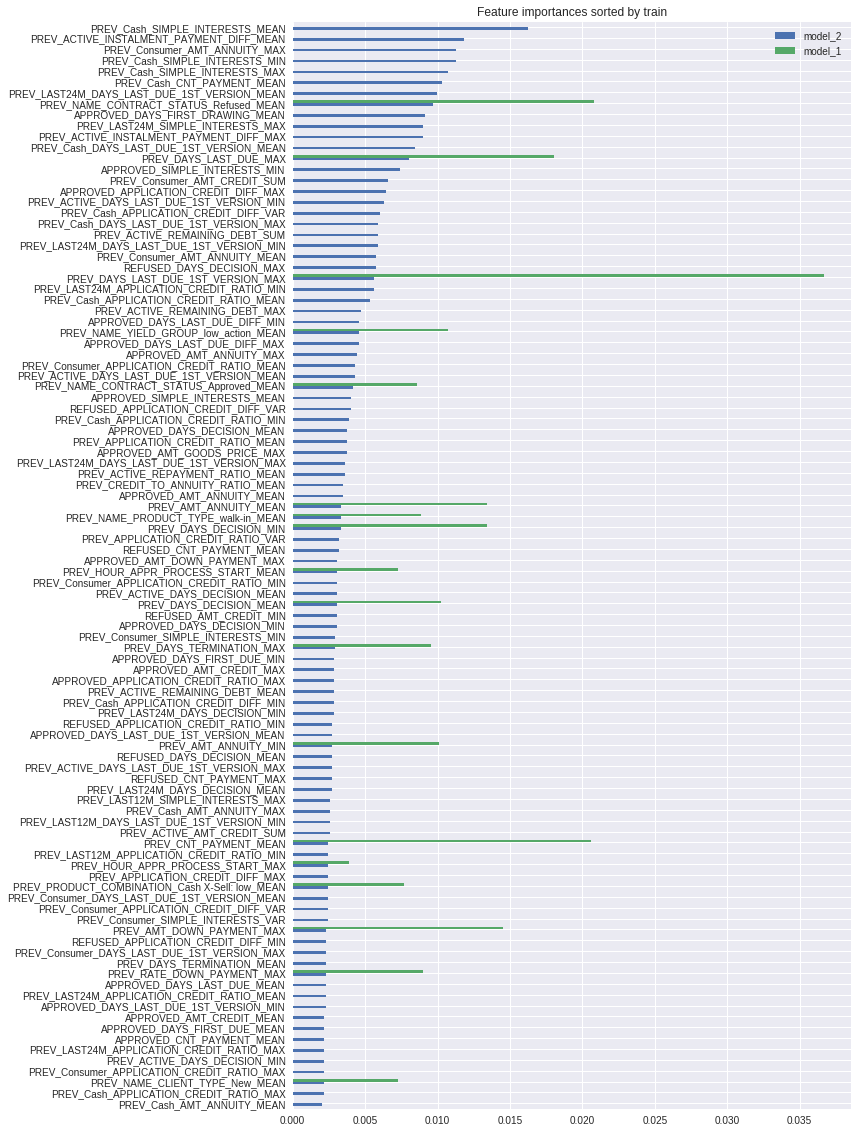

In [0]:
ax = imp.sort_values('model_2').tail(100).plot.barh(
    title='Feature importances sorted by train', figsize=(10,20))

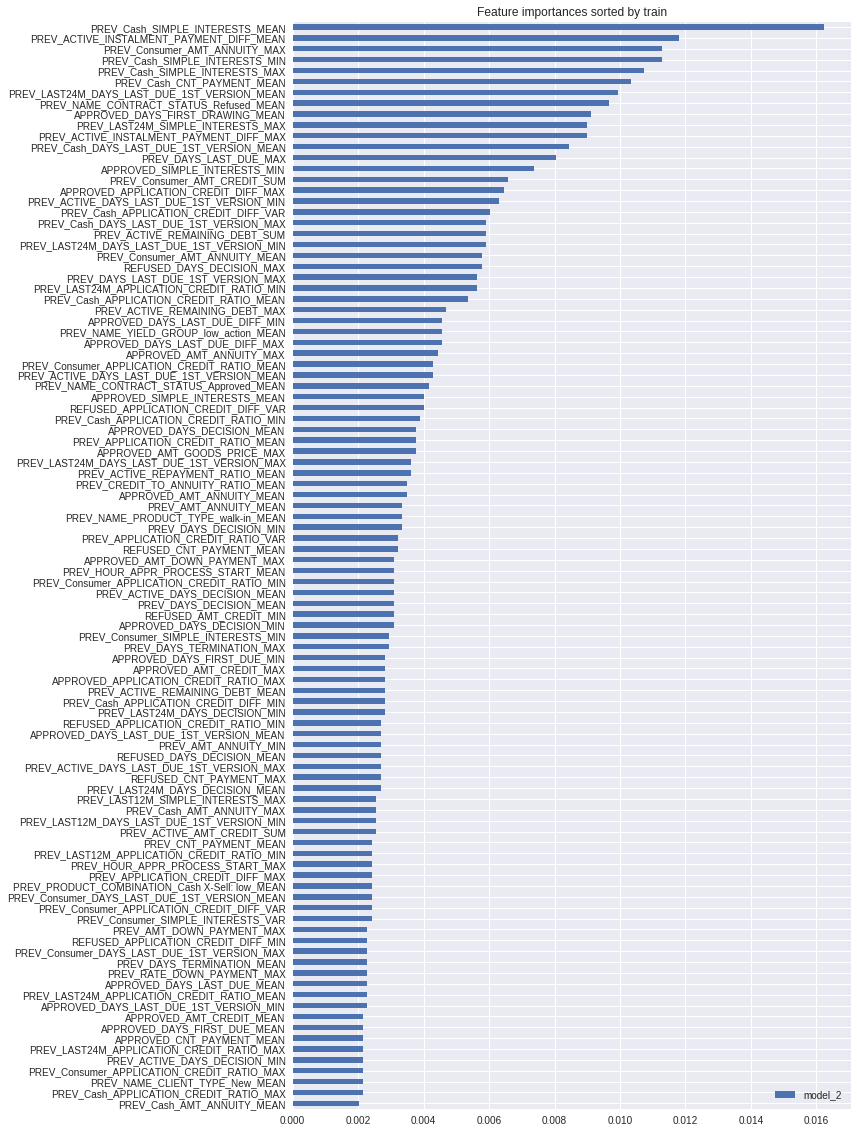

In [0]:
# # plot feature importance
# fig, ax = plt.subplots(figsize=(13, 16))
# xgb.plot_importance(xgb_model_2, ax =ax, max_num_features = 100)
# plt.show()

feature_names = X_2.columns
imp = pd.DataFrame(index=feature_names)
imp['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)
imp = imp.fillna(0)

prev_cols = prev.columns
imp = imp[imp.index.isin(prev_cols)]

ax = imp.sort_values('model_2').tail(100).plot.barh(
    title='Feature importances sorted by train', figsize=(10,20))

In [0]:
# Drop some less-information features
# imp[imp['model_2'] == 0].index
feature_names = X_2.columns
cols = pd.DataFrame(index=feature_names)
cols['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

prev_cols = prev.columns
cols = cols[cols.index.isin(prev_cols)]

cols[(cols['model_2'] == 0)].index

Index(['PREV_SK_ID_PREV_NUNIQUE',
       'PREV_NAME_CONTRACT_STATUS_Unused offer_MEAN',
       'PREV_NAME_CONTRACT_TYPE_XNA_MEAN', 'PREV_CHANNEL_TYPE_Car dealer_MEAN',
       'PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN',
       'PREV_PRODUCT_COMBINATION_POS others without interest_MEAN',
       'PREV_NAME_CLIENT_TYPE_XNA_MEAN', 'PREV_NAME_PORTFOLIO_Cars_MEAN',
       'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
       'PREV_ACTIVE_AMT_DOWN_PAYMENT_MEAN', 'APPROVED_DAYS_FIRST_DRAWING_MAX'],
      dtype='object')